# Development examples

In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import heputils

heputils.plot.set_style("ATLAS")
heputils.plot.set_experiment_info(status="Internal")  # Internal, Preliminary, Public
heputils.plot.set_experiment_info(
    center_of_mass_energy=13, center_of_mass_energy_units="TeV"
)  # Default values
heputils.plot.set_experiment_info(
    luminosity=132, luminosity_units="fb"
)  # Default values

In [2]:
root_file = uproot.open("example.root")
root_hists = [root_file[key].to_hist() for key in root_file.keys()]
data_hist = root_hists[-1]
simulation_hists = root_hists[:-1]

In [3]:
labels = [r"$t\bar{t}$", r"$W+$jets", "Other", "Signal"]
colormap = ["darkorange", "steelblue", "firebrick", "purple"]

scale_factors = np.ones(len(simulation_hists))
scale_factors[-1] = 5

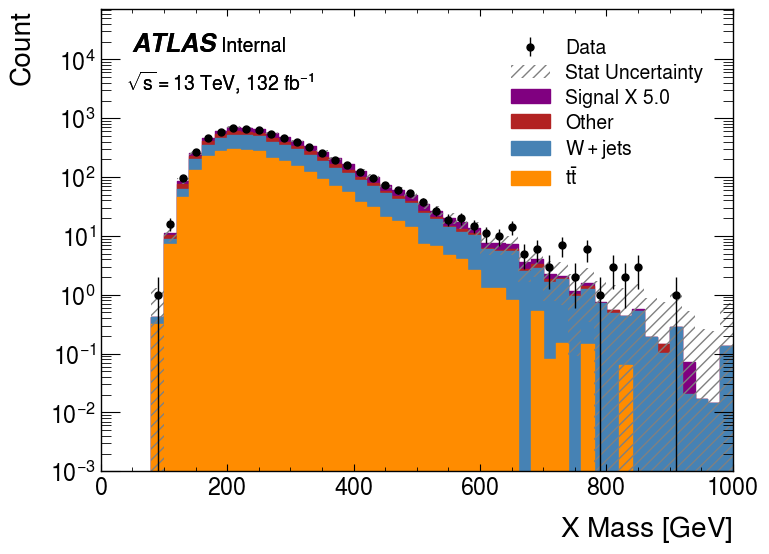

In [4]:
fig, ax = plt.subplots()
ax = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    scale_factors=scale_factors,
    ax=ax,
)
ax = heputils.plot.data_hist(data_hist, ax=ax);

In [5]:
fig.savefig("example_stack.png")

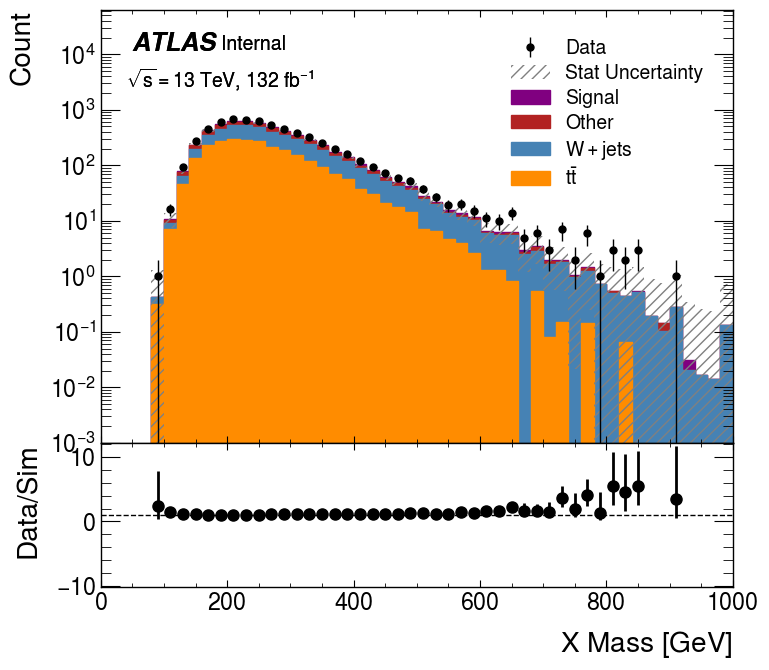

In [6]:
fig = plt.figure()
axs = heputils.plot.stack_ratio_plot(
    simulation_hists,
    data_hist=data_hist,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    rp_ylabel="Data/Sim",
)

In [7]:
fig.savefig("example_stack_ratio.png")

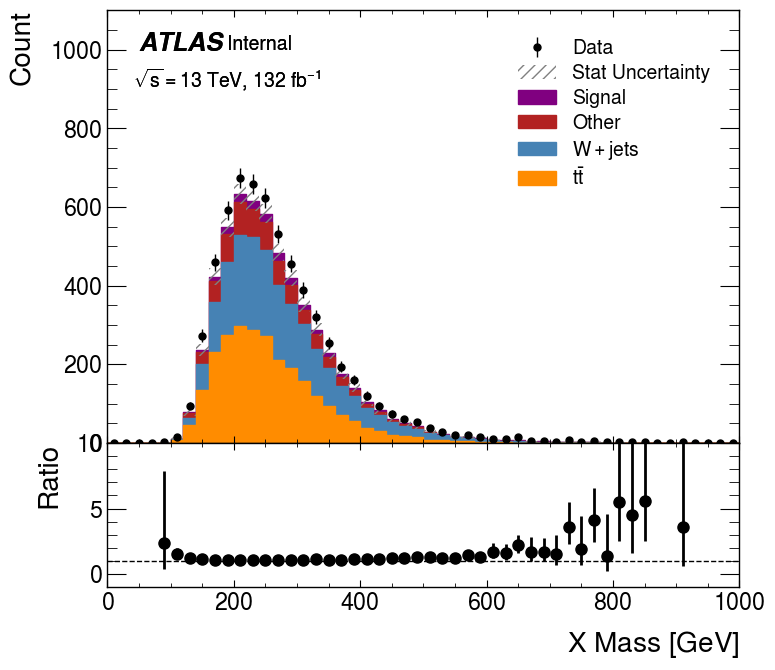

In [8]:
axs = heputils.plot.stack_ratio_plot(
    simulation_hists,
    data_hist=data_hist,
    labels=labels,
    color=colormap,
    rp_ylim=[-1, 10],
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    logy=False,
)

Can also give the data histogram directly to `heputils.plot.stack_hist`

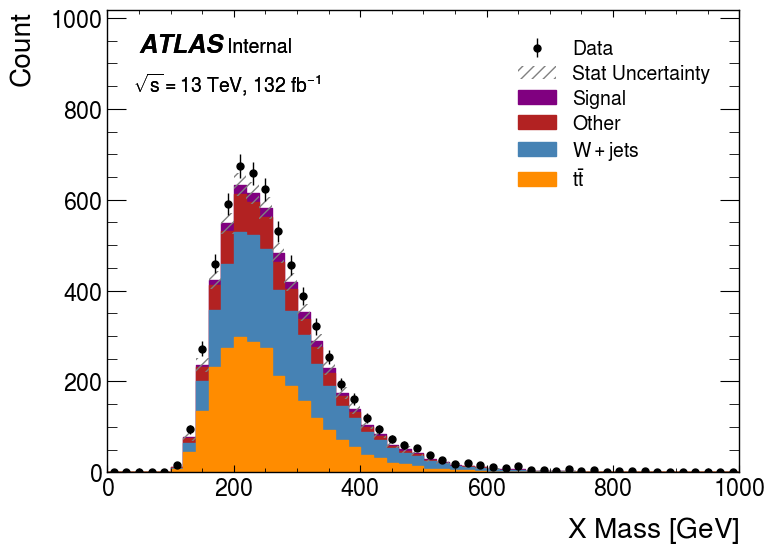

In [9]:
ax, artists = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    data_hist=data_hist,
    logy=False,
    return_artists=True,
)

Can easily plot on a `subplots` grid

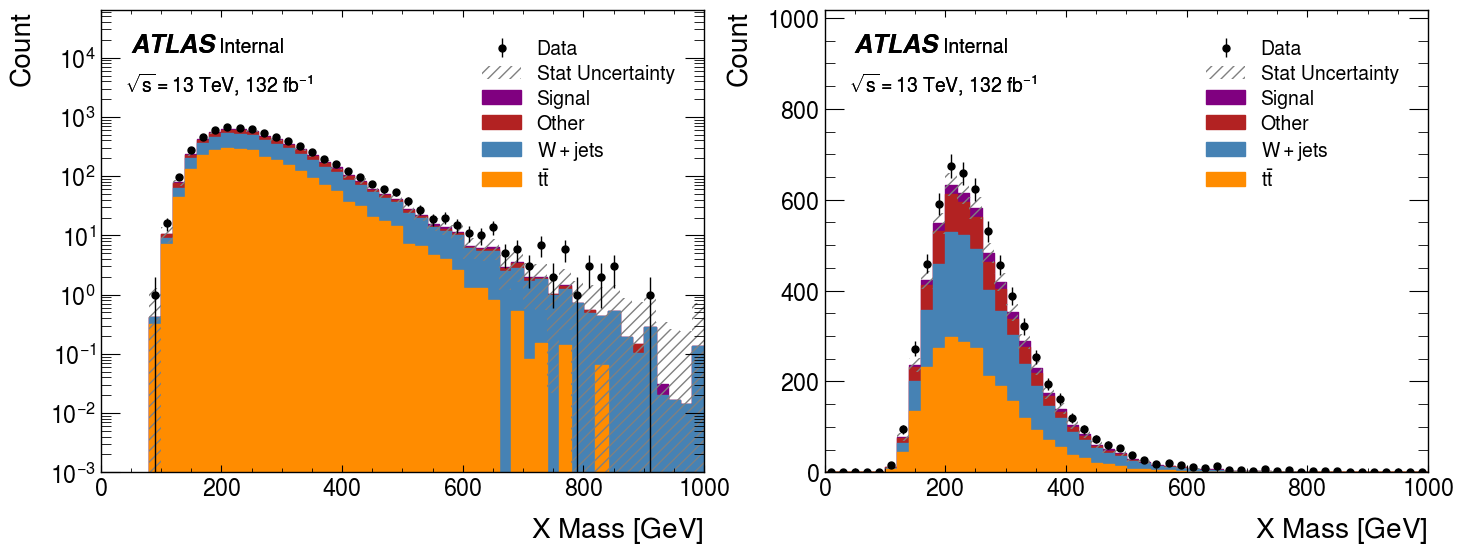

In [10]:
_fig_size = heputils.plot.get_style()["figure.figsize"]
fig, axs = plt.subplots(1, 2, figsize=(2.1 * _fig_size[0], _fig_size[1]))

axs[0] = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    data_hist=data_hist,
    ax=axs[0],
)
axs[1] = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    data_hist=data_hist,
    logy=False,
    ax=axs[1],
)

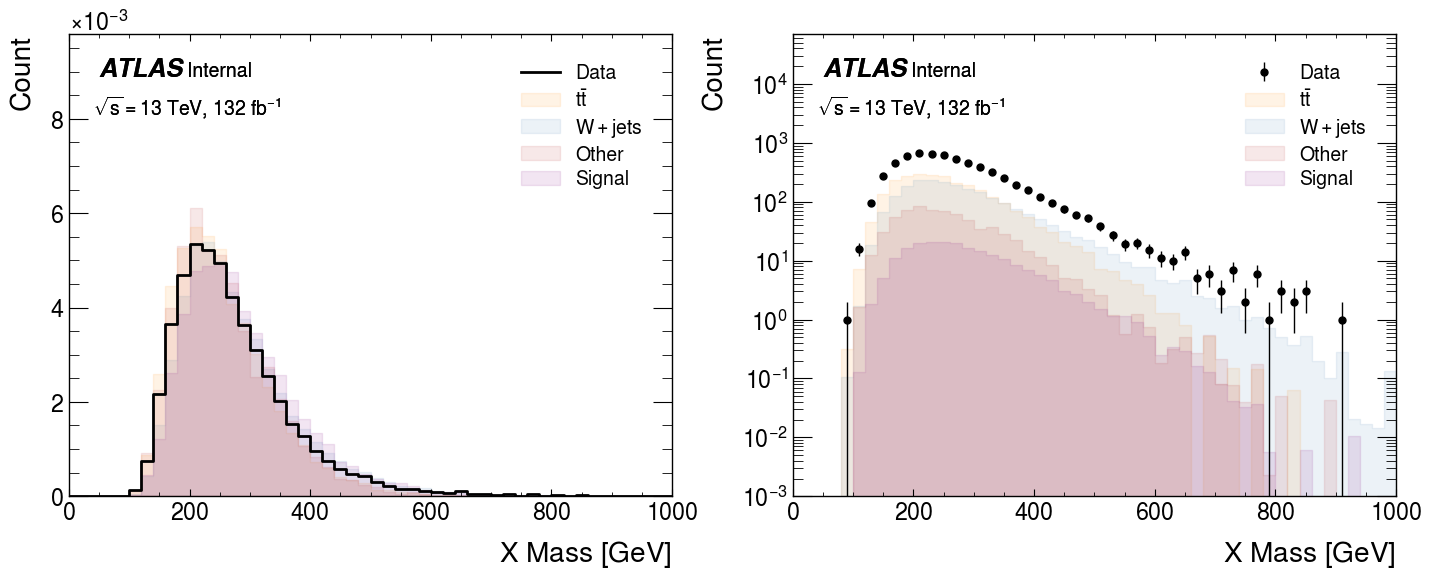

In [11]:
_fig_size = heputils.plot.get_style()["figure.figsize"]
fig, axs = plt.subplots(1, 2, figsize=(2.1 * _fig_size[0], _fig_size[1]))

axs[0] = heputils.plot.shape_hist(
    simulation_hists,
    data_hist=data_hist,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    ax=axs[0],
)
axs[1] = heputils.plot.shape_hist(
    simulation_hists,
    data_hist=data_hist,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    logy=True,
    density=False,
    ax=axs[1],
)

For a shape plot you can also easily switch between a `fill` style (shaded) and a `step` style (lines) using the `histtype` kwarg

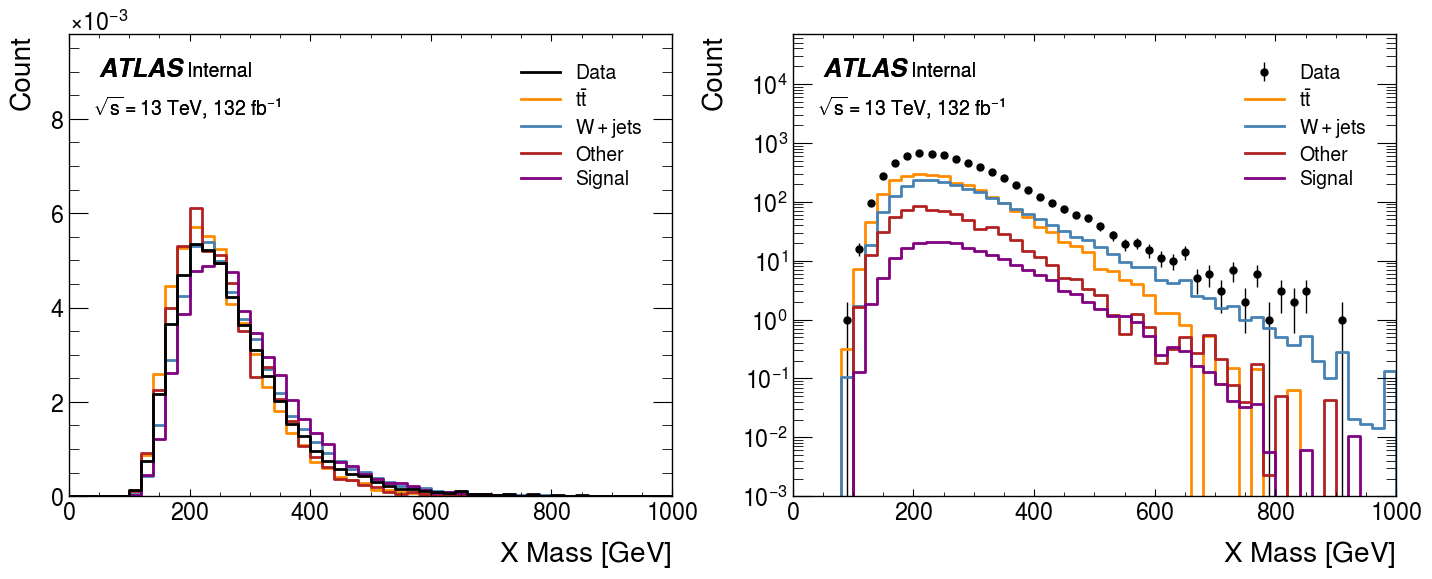

In [12]:
_fig_size = heputils.plot.get_style()["figure.figsize"]
fig, axs = plt.subplots(1, 2, figsize=(2.1 * _fig_size[0], _fig_size[1]))

axs[0] = heputils.plot.shape_hist(
    simulation_hists,
    data_hist=data_hist,
    labels=labels,
    color=colormap,
    histtype="step",
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    ax=axs[0],
)
axs[1] = heputils.plot.shape_hist(
    simulation_hists,
    data_hist=data_hist,
    labels=labels,
    color=colormap,
    histtype="step",
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    logy=True,
    density=False,
    ax=axs[1],
)

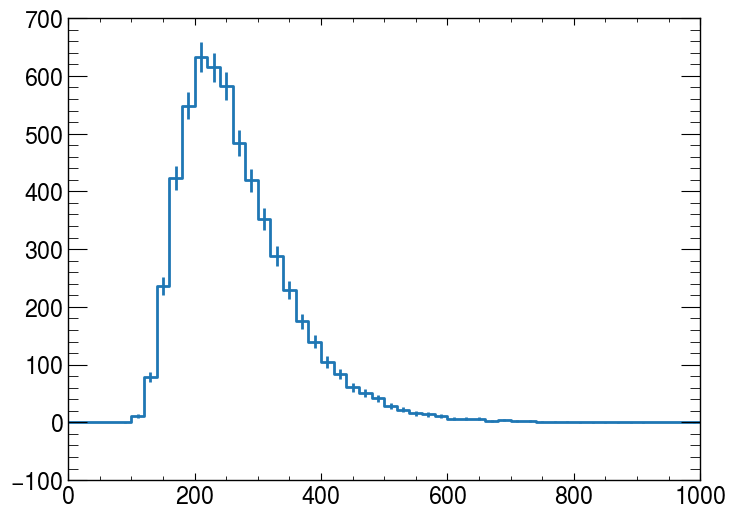

In [13]:
stacked_hist = heputils.utils.sum_hists(simulation_hists)
stacked_hist.plot();

In [14]:
stacked_hist

Hist(Regular(50, 0, 1000, name='xaxis', label='xaxis'), storage=Weight()) # Sum: WeightedSum(value=5680.49, variance=5680.49)